# import libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

### install kaggle to use its api for getting data

In [2]:
!pip install kaggle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### add kaggle.json in your drive for kaggle api access

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
%cd /content/drive/MyDrive/kaggle

/content/drive/MyDrive/kaggle


upload kaggle.json in kaggle in your drive

In [33]:
import json
with open('kaggle.json') as f:
    kaggle_json = json.load(f)

In [27]:
!mkdir data

In [34]:
import os

os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

download data in data folder

In [36]:
!kaggle datasets download -d blastchar/telco-customer-churn -p ./data/

100% 172k/172k [00:00<00:00, 502kB/s]
100% 172k/172k [00:00<00:00, 499kB/s]


now zip file downloaded we should unzip it

In [39]:
!unzip ./data/telco-customer-churn.zip -d ./data/

Archive:  ./data/telco-customer-churn.zip
  inflating: ./data/WA_Fn-UseC_-Telco-Customer-Churn.csv  


now we have csv dafa file ready to act read data and check null values


In [45]:
import pandas as pd

df = pd.read_csv('./data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [46]:
print("Number of null values in each column:\n", df.isnull().sum())

Number of null values in each column:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


there is not null value if it existed we could use 

df = df.dropna()

now we should splite features and target labels

In [53]:
X = df.drop('Churn', axis=1)
y = df['Churn']

Encode categorical variables

In [49]:
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [54]:
categorical_cols = df.select_dtypes(include=['category', 'object']).columns
print(categorical_cols)

Index([], dtype='object')


if you like labelencoding [0,1,2,3] chose labeEncoder

if you like onhotendocding [[011], [010]] choose onehot encoding

In [69]:
import sklearn
sklearn_version = sklearn.__version__
# handlling skitlearn change function name in versionin
def one_hot_encoder(df=df, categorical_cols=categorical_cols):
  if sklearn_version < '0.22':
      encoder = sklearn.preprocessing.OneHotEncoder(sparse_output=False, drop='first', handle_unknown='error')
      encoded_cols = encoder.fit_transform(df[categorical_cols])
      feature_names = encoder.get_feature_names(categorical_cols)
  else:
      encoder = sklearn.preprocessing.OneHotEncoder(sparse_output=False, drop='first')
      encoded_cols = encoder.fit_transform(df[categorical_cols])
      feature_names = encoder.get_feature_names_out(categorical_cols)

  # Create a new DataFrame with the encoded columns and concatenate it with the original DataFrame
  encoded_df = pd.DataFrame(encoded_cols, columns=feature_names)
  df_encoded = pd.concat([df.drop(categorical_cols, axis=1), encoded_df], axis=1)


In [70]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Assume that you have a DataFrame named `df` with categorical columns

# Prompt the user to choose an encoding method
print("Which encoding method would you like to use? (Enter 1 or 2)")
print("1. LabelEncoder")
print("2. OneHotEncoder")
choice = int(input())

# Encode the categorical columns based on the user's choice
if choice == 1:
    encoder = LabelEncoder()
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = encoder.fit_transform(df[col])
elif choice == 2:
    one_hot_encoder(df, categorical_cols)
else:
    print("Invalid choice. Please enter 1 or 2.")

Which encoding method would you like to use? (Enter 1 or 2)
1. LabelEncoder
2. OneHotEncoder
2


sacling numerical features

In [71]:
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
ct = ColumnTransformer([
        ('scale', StandardScaler(), numerical_cols)], remainder='passthrough')
X = ct.fit_transform(X)

In [72]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
# Build binary classification models using Logistic Regression, Decision Tree, and Random Forest
models = [
    ('Logistic Regression', Pipeline([('classifier', LogisticRegression())])),
    ('Decision Tree', Pipeline([('classifier', DecisionTreeClassifier())])),
    ('Random Forest', Pipeline([('classifier', RandomForestClassifier())]))
]

In [76]:

# Define the hyperparameters to search over for each model
param_grids = [
    {
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'classifier__penalty': ['l2', 'none']
    },
    {
        'classifier__max_depth': [3, 5, 7, 9],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    },
    {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [3, 5, 7, 9],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    }
]


## *Random Forest take lost of time so i paused it*


best parameters for Decision Tree
Best hyperparameters:  
{'classifier__max_depth': 5, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2}

accuracy_score :73

best parameters for Logistic Regression

Best hyperparameters:  
{'classifier__C': 1, 'classifier__penalty': 'l2'}

accuracy_score: 74

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

Logistic Regression
Best hyperparameters:  {'classifier__C': 1, 'classifier__penalty': 'l2'}
Accuracy: 0.8147622427253371
Confusion Matrix:
 [[940  96]
 [165 208]]
AUC Score: 0.7324883290030743


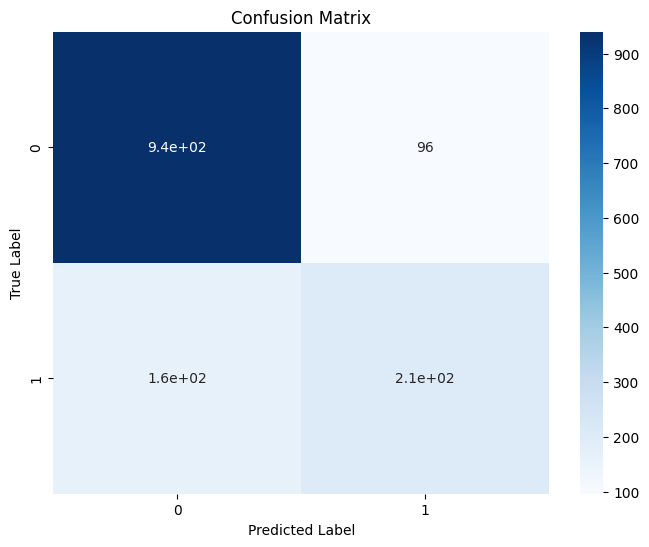

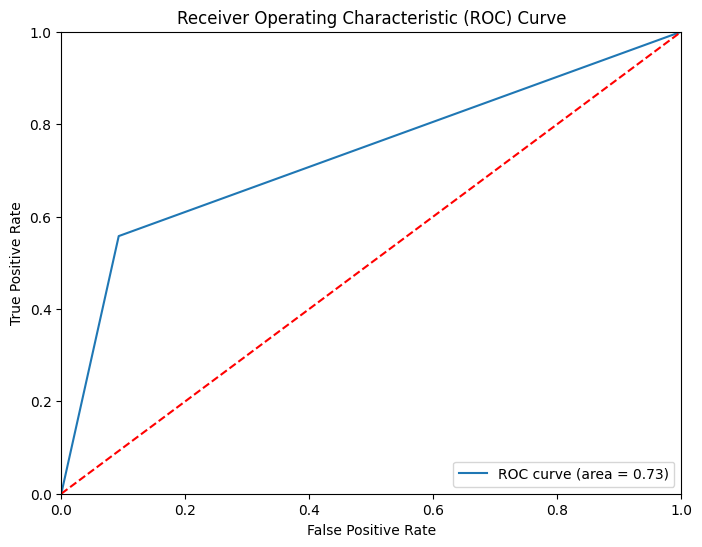

Decision Tree
Best hyperparameters:  {'classifier__max_depth': 5, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2}
Accuracy: 0.7934705464868701
Confusion Matrix:
 [[883 153]
 [138 235]]
AUC Score: 0.7411717059840384


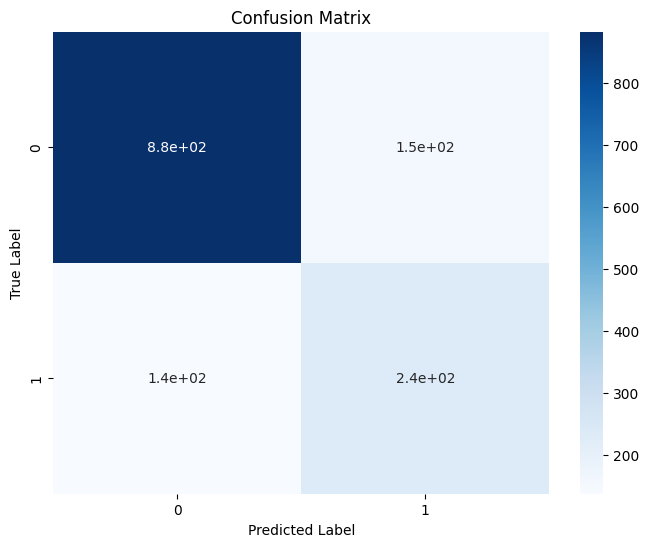

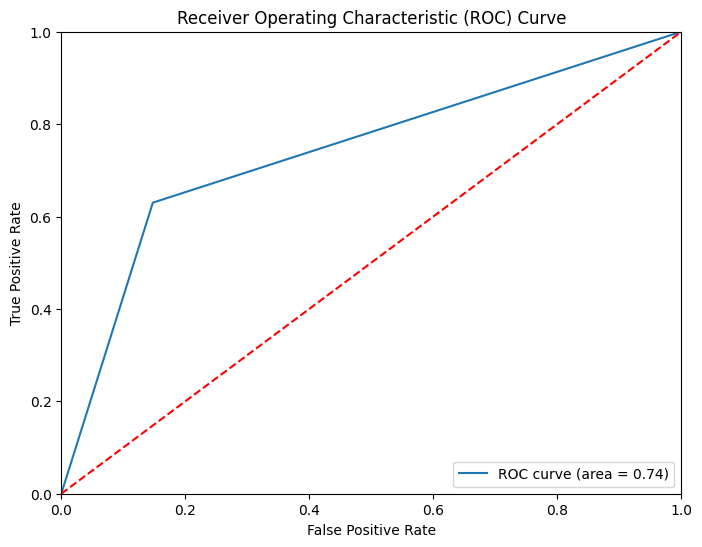

KeyboardInterrupt: ignored

In [78]:

# Train and evaluate each model using grid search
for model, param_grid in zip(models, param_grids):
    clf = GridSearchCV(model[1], param_grid, cv=5)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    
    # Print the results for each model
    print(model[0])
    print("Best hyperparameters: ", clf.best_params_)
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", conf_matrix)
    print("AUC Score:", auc_score)

        # Visualize the model's performance using a confusion matrix and ROC curve
    plt.figure(figsize=(8,6))
    plt.title('Confusion Matrix')
    sns.heatmap(conf_matrix, annot=True, cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    

## *Random Forest take lost of time so i paused it*

Load the dataset into a Pandas dataframe.

Perform exploratory data analysis (EDA) to gain insights into the data.

Preprocess the data by handling missing values, encoding categorical 
variables, and scaling the numerical features.

Split the data into training and testing sets.

Build a binary classification model using scikit-learn.

Tune the hyperparameters of the model using grid search or random search.

Evaluate the model's performance on the test set using appropriate evaluation metrics.

Visualize the model's performance using a confusion matrix and/or ROC curve.